In [26]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Import data

In [27]:
#btc options data
df=pd.read_csv('data/btc_data.csv', sep=",", index_col=0)

##### Core Trading Data

* best_bid_amount, best_ask_amount: The quantity available at the best bid and best ask prices.
* best_bid_price, best_ask_price: The highest price buyers are willing to pay (bid) and the lowest price sellers are willing to accept (ask).
* bid_iv, ask_iv: Implied volatility of the best bid and ask.
* underlying_index: The index or ticker symbol of the underlying asset, which in this case is Bitcoin.
* underlying_price: Current price of the underlying asset.
* mark_iv: The market's consensus on implied volatility.
* open_interest: Total number of outstanding derivative contracts, such as options or futures, that have not been settled.
* max_price, min_price: Maximum and minimum prices recorded.
* last_price: The most recent price at which the option was traded.

##### Advanced Trading Metrics
* interest_rate: Interest rate used for pricing options, typically a risk-free rate.
* asks, bids: These might contain more detailed order book data in JSON or another structured format.
* settlement_price: The price used for settling trades at the end of a trading period.
* mark_price: The current market price of the contracts.
* index_price: Index price that the derivative tracks.

##### Timestamps and Changes
* change_id: An identifier for tracking changes to data points.
* timestamp: UNIX timestamp indicating the time of data retrieval.


##### Greeks
* greeks.rho: Sensitivity to the interest rate.
* greeks.theta: Sensitivity to time decay.
* greeks.vega: Sensitivity to changes in the volatility of the underlying asset.
* greeks.gamma: The rate of change of delta with respect to changes in the underlying price.
* greeks.delta: The rate of change of the option's price with respect to changes in the underlying asset's price.

##### Statistical Data
* stats.volume_usd, stats.volume: Trading volume in USD and in units.
* stats.price_change, stats.low, stats.high: Change in price, lowest, and highest price during the recording period.

##### Settlement Information
* settlement_period: The periodicity of settlement, such as daily, weekly, etc.

### Data Cleaning and Preparation

### Bitcoin

In [28]:
df.columns

Index(['best_ask_amount', 'ask_iv', 'bid_iv', 'underlying_index',
       'underlying_price', 'mark_iv', 'best_bid_price', 'best_ask_price',
       'interest_rate', 'mark_price', 'open_interest', 'max_price',
       'min_price', 'settlement_price', 'last_price', 'asks', 'bids',
       'instrument_name', 'index_price', 'change_id', 'timestamp',
       'greeks.rho', 'greeks.theta', 'greeks.vega', 'greeks.gamma',
       'greeks.delta', 'stats.volume_usd', 'stats.volume',
       'stats.price_change', 'stats.low', 'stats.high', 'settlement_period',
       'Expiration Date', 'Strike Price', 'Time to Expiration'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630 entries, 0.0 to 0.0
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   best_ask_amount     630 non-null    float64
 1   ask_iv              630 non-null    float64
 2   bid_iv              630 non-null    float64
 3   underlying_index    630 non-null    object 
 4   underlying_price    630 non-null    float64
 5   mark_iv             630 non-null    float64
 6   best_bid_price      630 non-null    float64
 7   best_ask_price      630 non-null    float64
 8   interest_rate       630 non-null    float64
 9   mark_price          630 non-null    float64
 10  open_interest       630 non-null    float64
 11  max_price           630 non-null    float64
 12  min_price           630 non-null    float64
 13  settlement_price    620 non-null    float64
 14  last_price          548 non-null    float64
 15  asks                630 non-null    object 
 16  bids       

In [30]:
df.isnull().sum()

best_ask_amount         0
ask_iv                  0
bid_iv                  0
underlying_index        0
underlying_price        0
mark_iv                 0
best_bid_price          0
best_ask_price          0
interest_rate           0
mark_price              0
open_interest           0
max_price               0
min_price               0
settlement_price       10
last_price             82
asks                    0
bids                    0
instrument_name         0
index_price             0
change_id               0
timestamp               0
greeks.rho              0
greeks.theta            0
greeks.vega             0
greeks.gamma            0
greeks.delta            0
stats.volume_usd        0
stats.volume            0
stats.price_change    465
stats.low             465
stats.high            465
settlement_period       0
Expiration Date         0
Strike Price            0
Time to Expiration      0
dtype: int64

In [31]:
#Get descriptive statistics
df.describe()

best_ask_amount      ask_iv      bid_iv  underlying_price     mark_iv  \
count       630.000000  630.000000  630.000000        630.000000  630.000000   
mean         15.370317   40.622984   31.969873      70377.834716   68.080873   
std          37.661397   38.730648   30.447317        609.922806   15.397586   
min           0.000000    0.000000    0.000000      69232.750000   52.400000   
25%           0.000000    0.000000    0.000000      69787.900000   57.935000   
50%           3.100000   56.590000   52.665000      70640.990000   61.550000   
75%          17.075000   64.347500   55.877500      70887.620000   74.012500   
max         580.600000  241.260000  164.570000      71073.240000  173.710000   

       best_bid_price  best_ask_price  interest_rate  mark_price  \
count      630.000000      630.000000          630.0  630.000000   
mean         0.121637        0.140016            0.0    0.250324   
std          0.241063        0.270106            0.0    0.319006   
min          0.000000        0.000000            0.0    0.000100   
25%          0.000000        0.000000            0.0    0.040225   
50%          0.006000        0.010750            0.0    0.143400   
75%          0.139750        0.151750            0.0    0.333600   
max          1.719000        1.835500            0.0    1.905400   

       open_interest  ...  greeks.vega  greeks.gamma  greeks.delta  \
count     630.000000  ...   630.000000    630.000000    630.000000   
mean      105.327143  ...   107.753774      0.000010      0.045911   
std       287.000348  ...    72.654440      0.000008      0.593953   
min         0.000000  ...     0.490090      0.000000     -0.997250   
25%         0.000000  ...    46.994700      0.000000     -0.432720   
50%        10.300000  ...   100.665320      0.000010      0.001135   
75%        68.625000  ...   159.766057      0.000020      0.566153   
max      4367.300000  ...   264.979080      0.000030      0.999520   

       stats.volume_usd  stats.volume  stats.price_change   stats.low  \
count      6.300000e+02    630.000000          165.000000  165.000000   
mean       9.935333e+04      7.463333            4.585126    0.180781   
std        7.579256e+05     31.905122           19.763253    0.301261   
min        0.000000e+00      0.000000          -48.920900    0.000100   
25%        0.000000e+00      0.000000           -0.868200    0.019000   
50%        0.000000e+00      0.000000            0.000000    0.061500   
75%        1.263000e+02      0.200000            1.075300    0.204000   
max        1.329641e+07    367.500000          128.571400    1.828200   

       stats.high   Strike Price  Time to Expiration  
count  165.000000     630.000000          630.000000  
mean     0.188994   77803.174603            0.384231  
std      0.309364   37033.040583            0.279554  
min      0.000100   10000.000000            0.082192  
25%      0.019500   52250.000000            0.158904  
50%      0.069500   71000.000000            0.254795  
75%      0.215100   90000.000000            0.657534  
max      1.947100  200000.000000            0.906849  

[8 rows x 29 columns]

In [7]:
btc_data_key= df
key_metrics = ['best_bid_price', 'best_ask_price', 'bid_iv', 'ask_iv', 'mark_iv', 
               'greeks.theta', 'greeks.vega', 'greeks.gamma', 'greeks.delta']

descriptive_stats = btc_data_key[key_metrics].describe()

# Additionally, calculate the interquartile range (IQR) to identify potential outliers
Q1 = df[key_metrics].quantile(0.25)
Q3 = df[key_metrics].quantile(0.75)
IQR = Q3 - Q1

descriptive_stats, IQR

(       best_bid_price  best_ask_price      bid_iv      ask_iv     mark_iv  \
 count      238.000000      238.000000  238.000000  238.000000  238.000000   
 mean         0.028561        0.051362   25.214244   58.316218   81.093782   
 std          0.070010        0.117790   40.399236   90.915416   33.506296   
 min          0.000000        0.000000    0.000000    0.000000   50.070000   
 25%          0.000000        0.000000    0.000000    0.000000   62.540000   
 50%          0.000000        0.000100    0.000000   26.005000   68.180000   
 75%          0.023375        0.042875   59.455000   70.730000   89.257500   
 max          0.552500        0.950000  313.810000  635.360000  200.000000   
 
        greeks.theta  greeks.vega  greeks.gamma  greeks.delta  
 count    238.000000   238.000000    238.000000    238.000000  
 mean     -74.828295    31.382341      0.000024      0.113151  
 std       62.967640    25.818286      0.000026      0.603862  
 min     -288.425630     0.000220      0

In [8]:
btc_data_key.describe()

best_ask_amount      ask_iv      bid_iv  underlying_price     mark_iv  \
count       238.000000  238.000000  238.000000        238.000000  238.000000   
mean         11.315546   58.316218   25.214244      71786.161899   81.093782   
std          24.565232   90.915416   40.399236        817.623989   33.506296   
min           0.000000    0.000000    0.000000      68538.145000   50.070000   
25%           0.000000    0.000000    0.000000      71382.806700   62.540000   
50%           0.350000   26.005000    0.000000      71678.850000   68.180000   
75%          10.175000   70.730000   59.455000      72645.270000   89.257500   
max         195.700000  635.360000  313.810000      72651.640000  200.000000   

       best_bid_price  best_ask_price  interest_rate  mark_price  \
count      238.000000      238.000000          238.0  238.000000   
mean         0.028561        0.051362            0.0    0.112892   
std          0.070010        0.117790            0.0    0.154031   
min          0.000000        0.000000            0.0    0.000000   
25%          0.000000        0.000000            0.0    0.009950   
50%          0.000000        0.000100            0.0    0.050100   
75%          0.023375        0.042875            0.0    0.146600   
max          0.552500        0.950000            0.0    0.945400   

       open_interest  ...  greeks.theta  greeks.vega  greeks.gamma  \
count     238.000000  ...    238.000000   238.000000    238.000000   
mean       71.271008  ...    -74.828295    31.382341      0.000024   
std       619.735086  ...     62.967640    25.818286      0.000026   
min         0.000000  ...   -288.425630     0.000220      0.000000   
25%         0.000000  ...   -106.119605     3.009947      0.000000   
50%         0.000000  ...    -72.751145    28.640340      0.000020   
75%        19.025000  ...    -21.072392    57.120290      0.000040   
max      9406.300000  ...     -0.001040    75.154400      0.000130   

       greeks.delta  stats.volume_usd  stats.volume  stats.price_change  \
count    238.000000      2.380000e+02    238.000000           69.000000   
mean       0.113151      4.064064e+04     10.843277            2.190636   
std        0.603862      3.240753e+05     88.373616           55.291277   
min       -0.999480      0.000000e+00      0.000000          -93.626400   
25%       -0.311030      0.000000e+00      0.000000           -5.555600   
50%        0.000270      0.000000e+00      0.000000            0.000000   
75%        0.668547      1.036900e+02      0.625000            0.000000   
max        1.000000      4.141151e+06   1337.000000          330.000000   

       stats.low  stats.high   Strike Price  
count  69.000000   69.000000     238.000000  
mean    0.041510    0.046617   69915.966387  
std     0.075962    0.076460   18436.150432  
min     0.000100    0.000100   30000.000000  
25%     0.002600    0.004500   60000.000000  
50%     0.015000    0.021500   68000.000000  
75%     0.044500    0.048000   77000.000000  
max     0.372000    0.372000  140000.000000  

[8 rows x 28 columns]

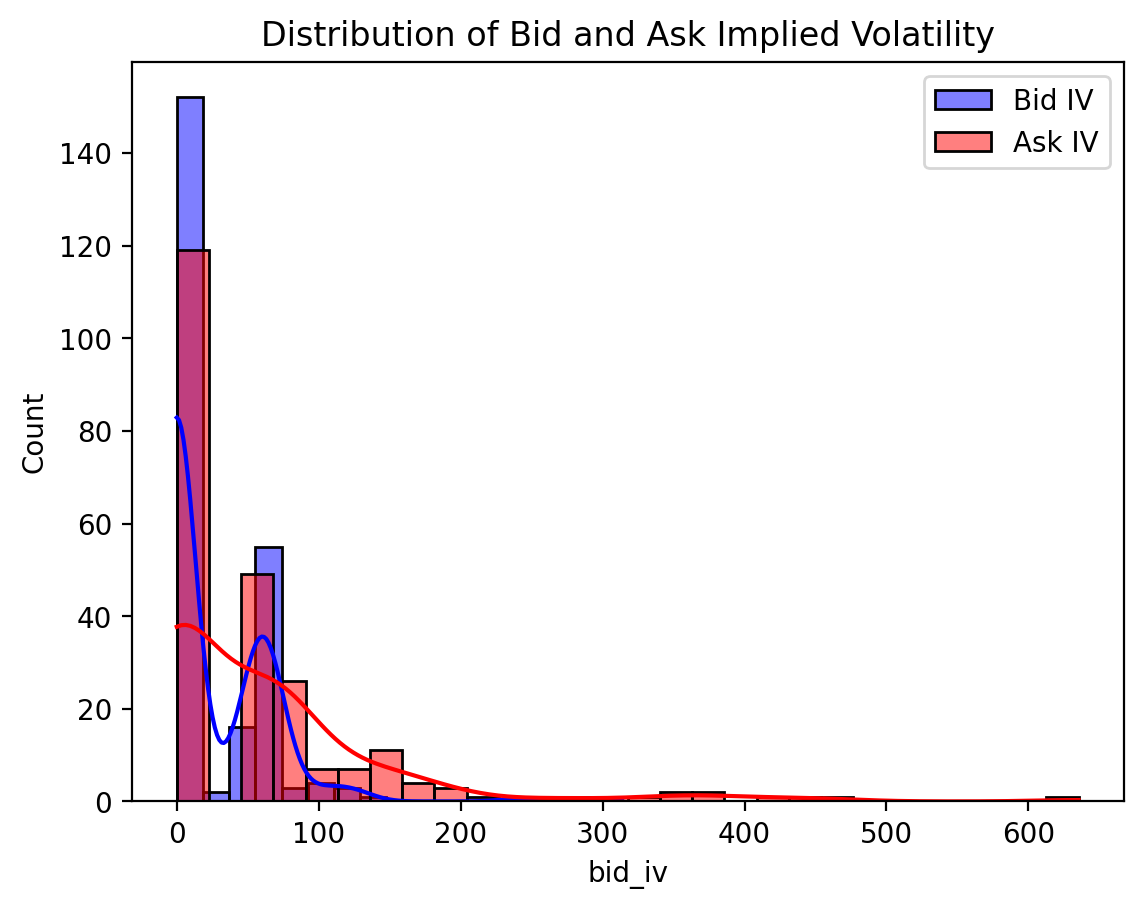

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['bid_iv'].dropna(), color='blue', label='Bid IV', kde=True)
sns.histplot(df['ask_iv'].dropna(), color='red', label='Ask IV', kde=True)
plt.legend()
plt.title('Distribution of Bid and Ask Implied Volatility')
plt.show()


The majority of Bid and Ask IV values are concentrated around lower figures, with a significant peak close to zero. This suggests that many options are perceived to have low volatility, but there is also a noticeable tail extending towards higher values.

In [10]:
median_bid_iv = df['bid_iv'].median()
median_ask_iv = df['ask_iv'].median()
print(f"Median Bid IV: {median_bid_iv}, Median Ask IV: {median_ask_iv}")


Median Bid IV: 0.0, Median Ask IV: 26.005


In [12]:
btc_data = df

### Options Greeks Visualization

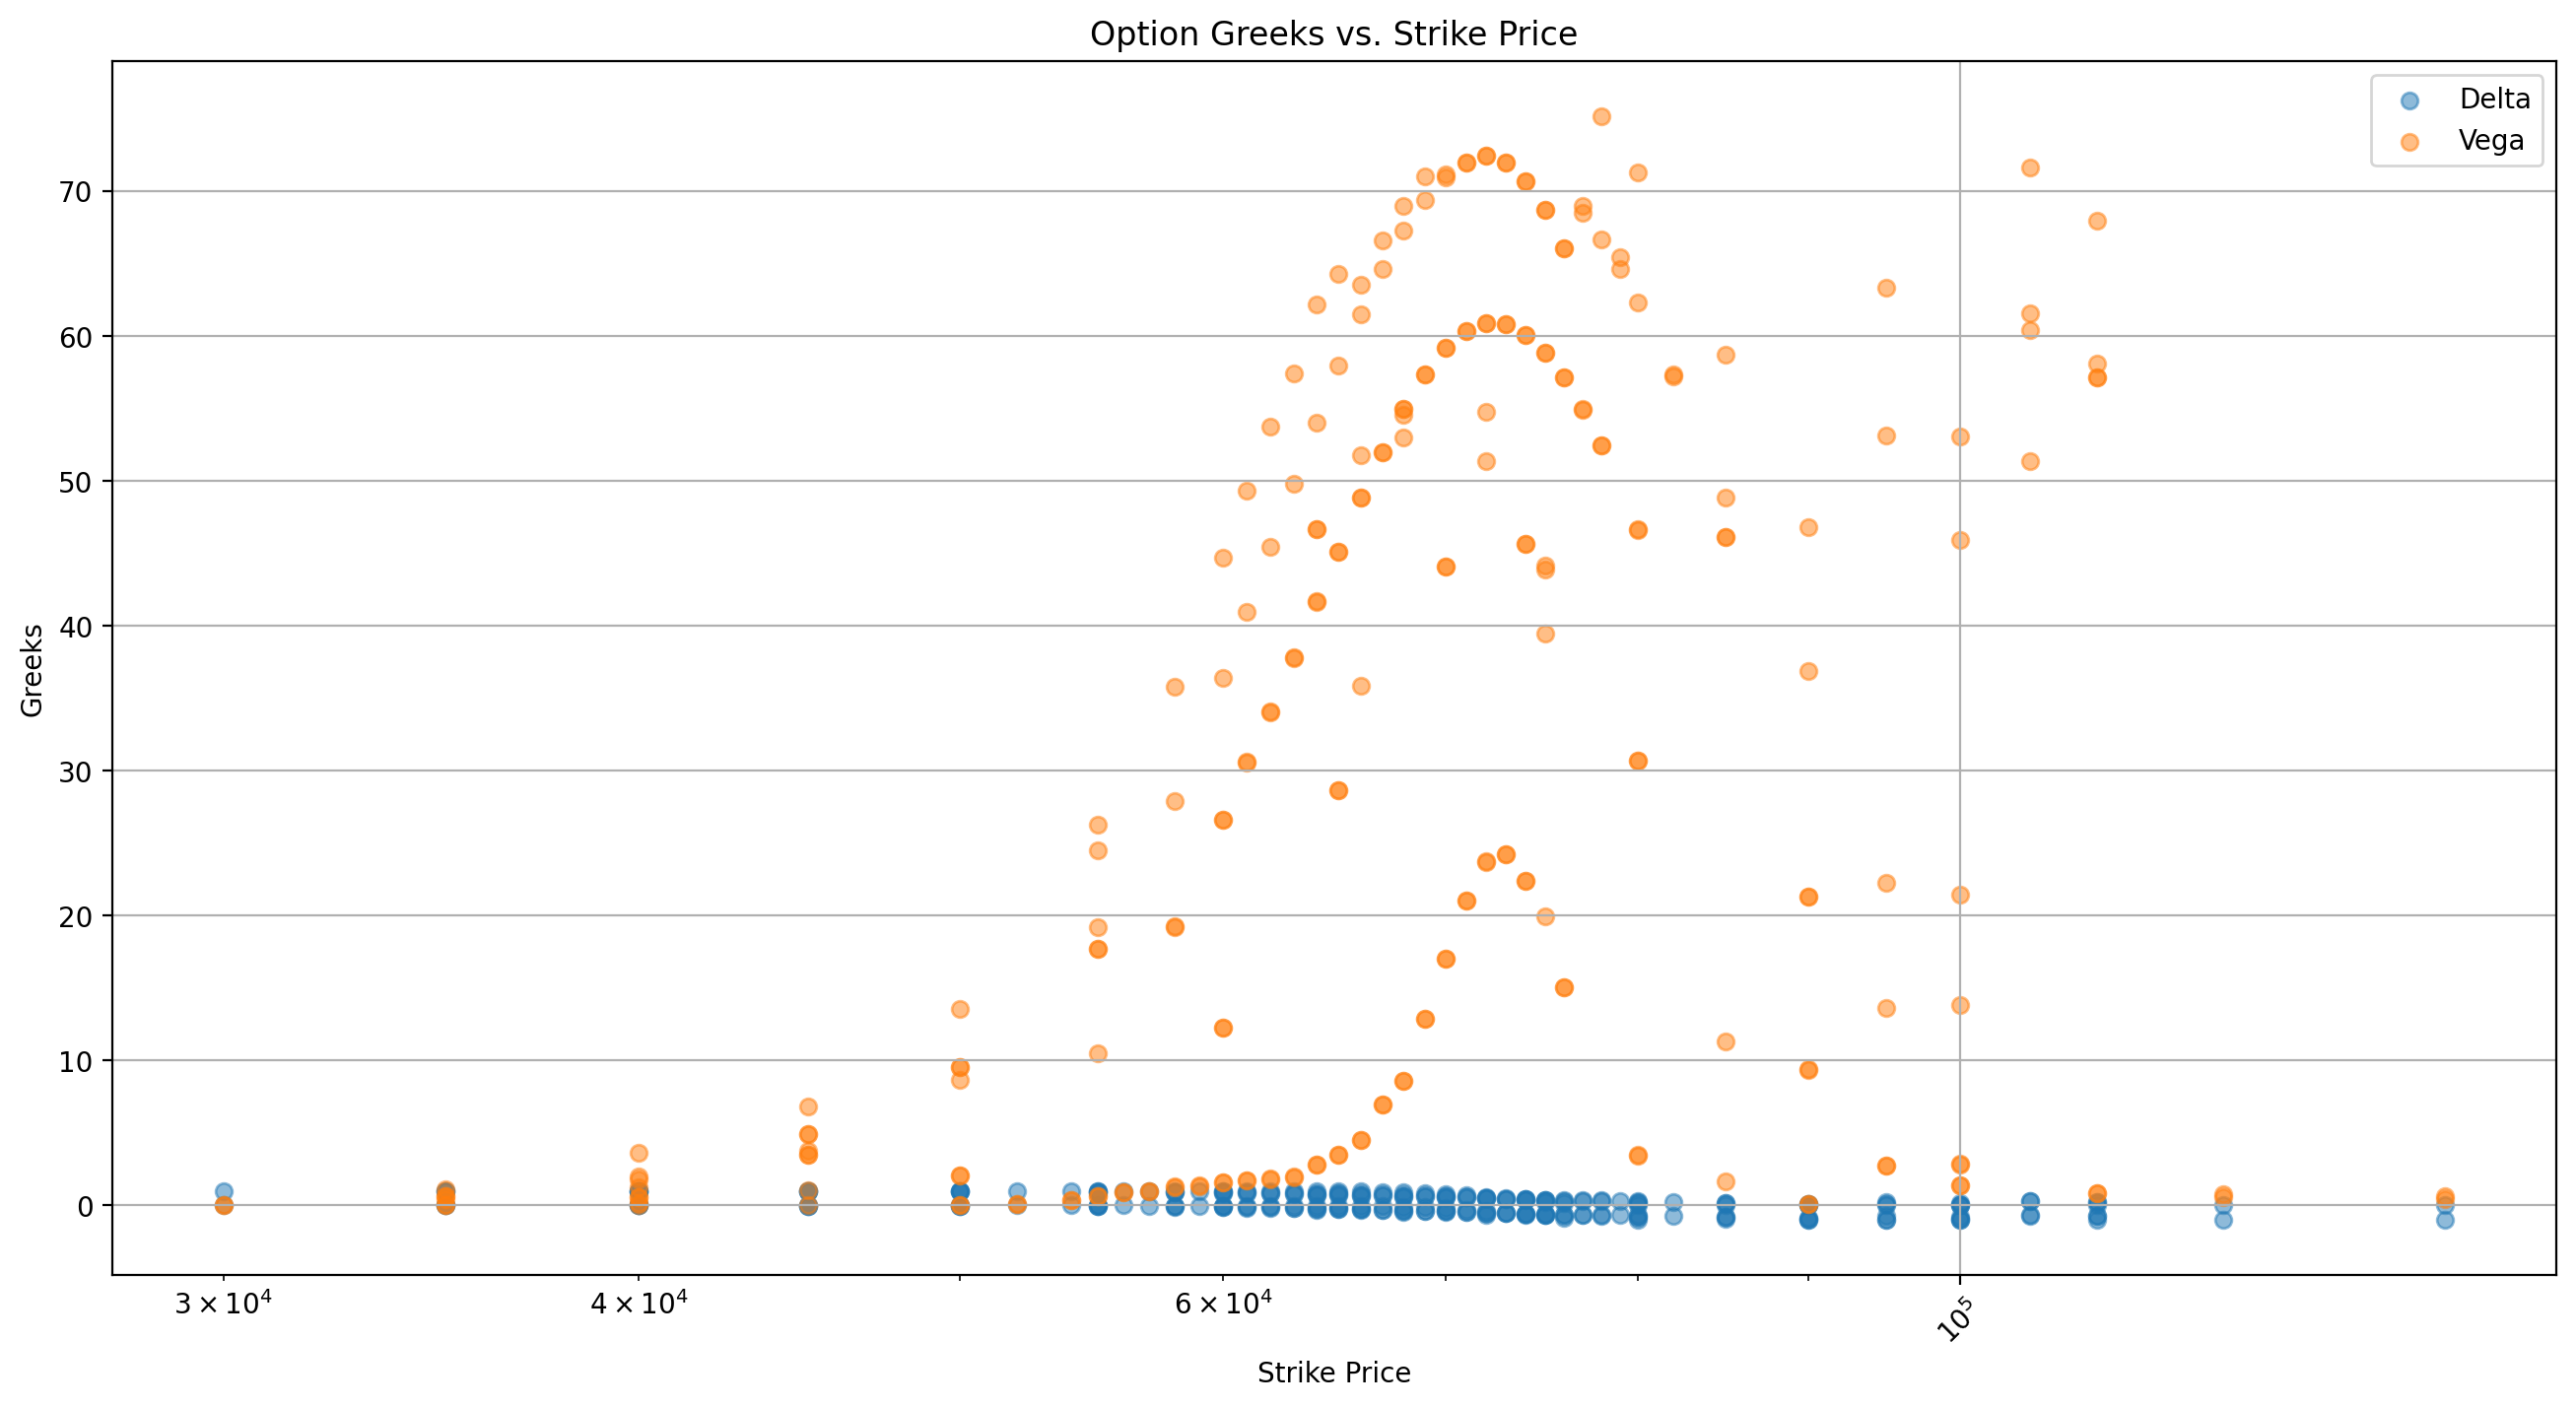

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))  # Larger figure size
plt.scatter(df['Strike Price'], df['greeks.delta'], label='Delta', alpha=0.5)
plt.scatter(df['Strike Price'], df['greeks.vega'], label='Vega', alpha=0.5)
plt.title('Option Greeks vs. Strike Price')
plt.xlabel('Strike Price')
plt.ylabel('Greeks')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xscale('log')  # Optional: Only use if appropriate for your data range
plt.grid(True)  # Enable grid for better readability
plt.legend()
plt.show()


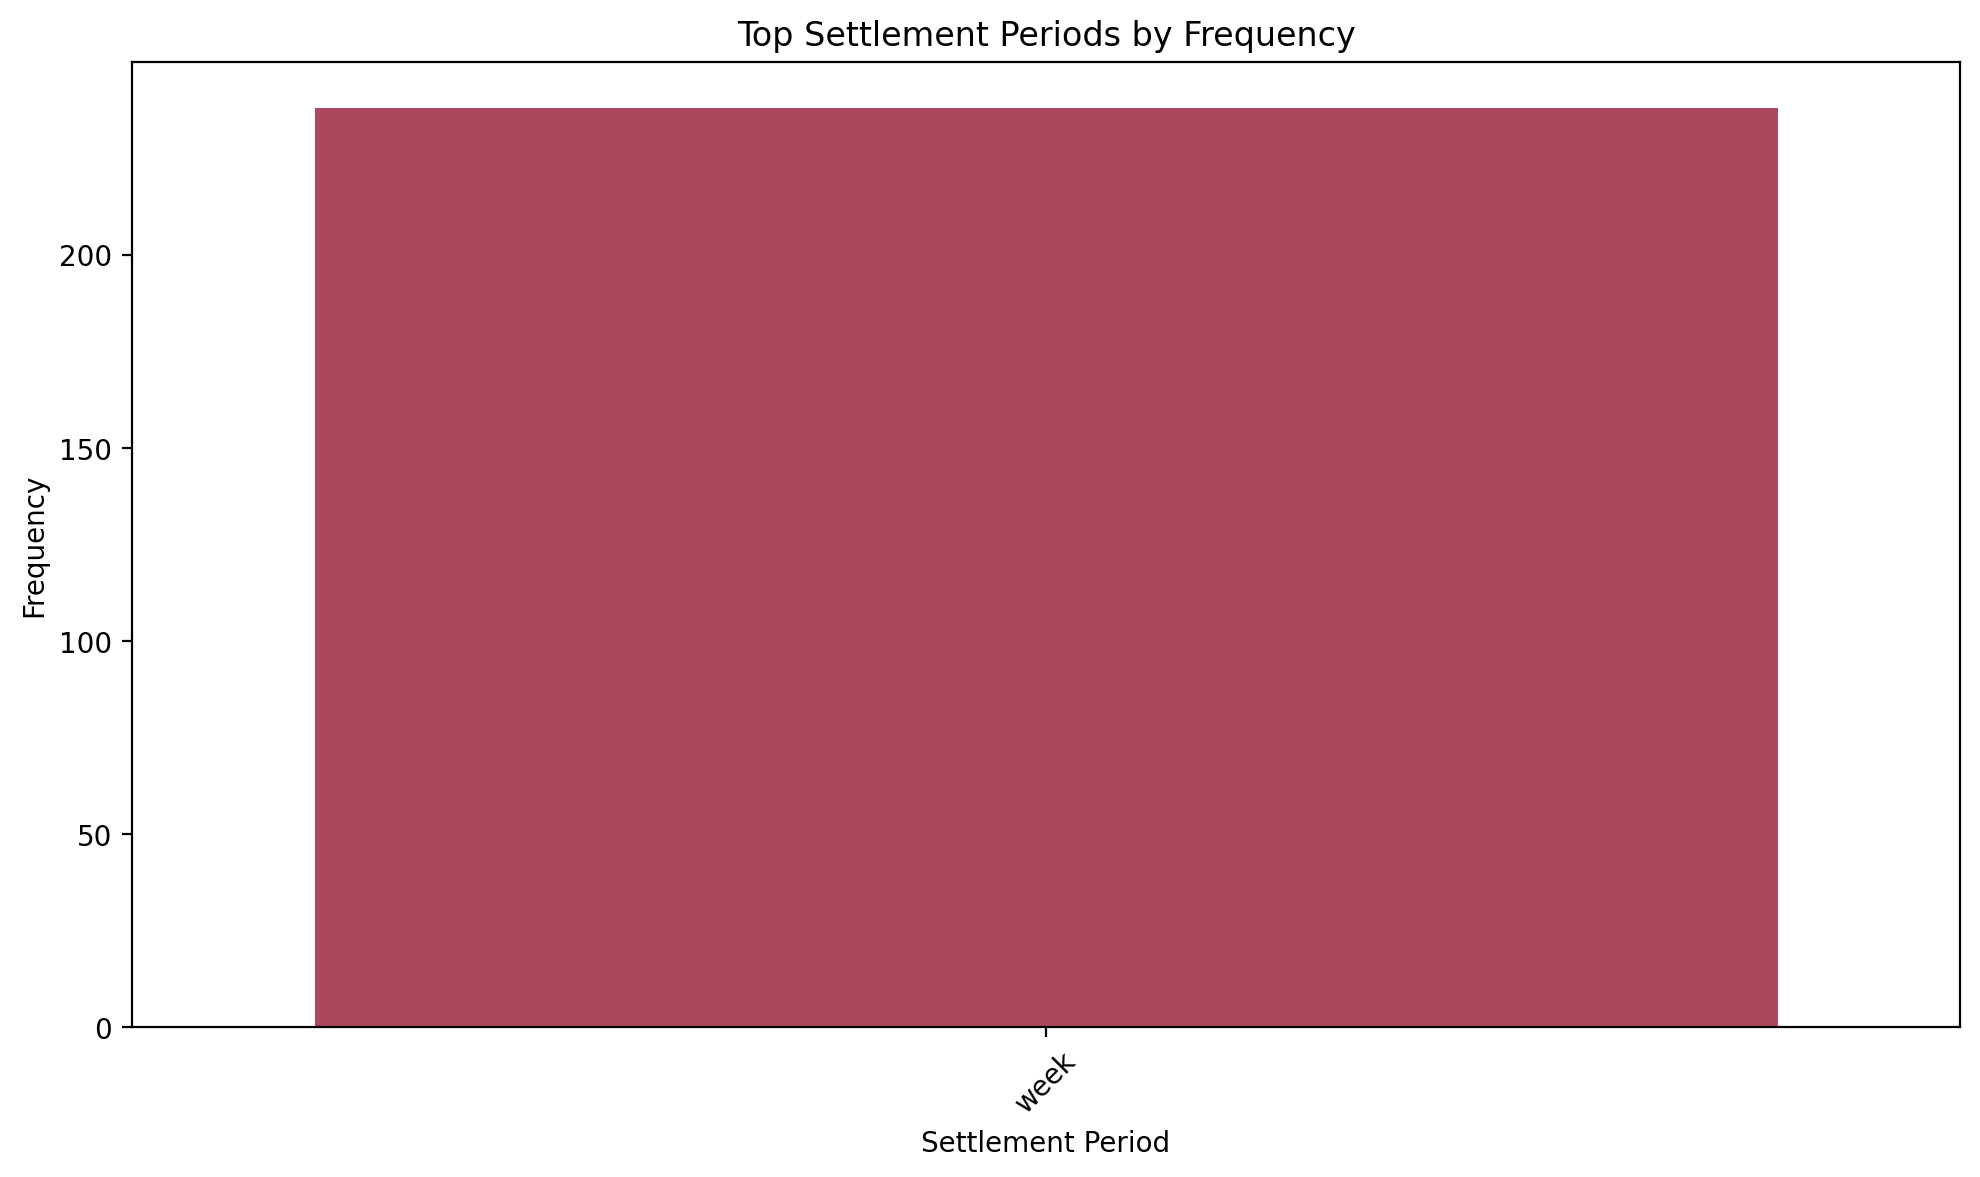

In [14]:
# Compute the frequency of each unique settlement period
btc_settlement_freq = df['settlement_period'].value_counts().reset_index()
btc_settlement_freq.columns = ['settlement_period', 'Frequency']  # Renaming columns appropriately

# Creating a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='settlement_period', y='Frequency', data=btc_settlement_freq, palette="inferno")
plt.xticks(rotation=45)
plt.xlabel('Settlement Period')
plt.ylabel('Frequency')
plt.title('Top Settlement Periods by Frequency')
plt.tight_layout()
plt.show()

## Correlation

In [15]:
import pandas as pd
import numpy as np

num_data = df.select_dtypes(include=['int64', 'float64'])
corr = num_data.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

c:\Users\Ethan Vaz Falcao\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\Ethan Vaz Falcao\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [17]:
from datetime import datetime

btc_options_filtered = df[['underlying_price', 'Strike Price', 'mark_iv', 'Expiration Date', "mark_price"]]

# Renaming columns for clarity
btc_options_filtered.columns = ['Spot Price', 'Strike Price', 'Implied Volatility', 'Expiration Date',"mark_price"]

# Parse the expiration dates and calculate time to expiration (in years)
today = datetime.today()

btc_options_filtered['Time to Expiration'] = btc_options_filtered['Expiration Date'].apply(
    lambda x: (datetime.strptime(x, '%d%b%y') - today).days / 365)

C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_17852\55402180.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_options_filtered['Time to Expiration'] = btc_options_filtered['Expiration Date'].apply(


In [18]:
df = btc_options_filtered

In [19]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import minimize

# Black-Scholes call option pricing formula
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Function to calculate the implied volatility using numerical method
def implied_volatility(S, K, T, r, market_price):
    # Define a function that calculates the difference between market price and BSM price
    def objective_function(sigma):
        return (black_scholes_call(S, K, T, r, sigma) - market_price) ** 2
    
    # Initial guess for volatility
    initial_guess = 0.2
    
    # Use 'minimize' from scipy to minimize the objective function
    result = minimize(objective_function, initial_guess, bounds=[(0.0001, 5.0)], method='L-BFGS-B')
    
    return result.x[0]

# Assuming a constant risk-free rate of 3% (0.03)
constant_risk_free_rate = 0.03



# Add a new column for recalculated implied volatility, using the constant RFR
df['Recalculated Implied Volatility'] = df.apply(lambda row: implied_volatility(
    row['Spot Price'], row['Strike Price'], row['Time to Expiration'], constant_risk_free_rate, row['mark_price']
), axis=1)



C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_17852\605063689.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Recalculated Implied Volatility'] = df.apply(lambda row: implied_volatility(


In [20]:
import plotly.graph_objects as go
import numpy as np

# Extracting relevant data for the surface plot
strikes = btc_options_filtered['Strike Price'].values
times_to_expiration = btc_options_filtered['Time to Expiration'].values
implied_vols = btc_options_filtered['Recalculated Implied Volatility'].values

# Create meshgrid for 3D plotting
X, Y = np.meshgrid(strikes, times_to_expiration)
Z = np.tile(implied_vols, (len(times_to_expiration), 1))

# Create the interactive 3D surface plot
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])

# Add labels to the plot
fig.update_layout(
    title='Interactive Implied Volatility Surface',
    scene=dict(
        xaxis_title='Strike Price',
        yaxis_title='Time to Expiration',
        zaxis_title='Implied Volatility'
    )
)

# Show the interactive plot
fig.show()


### Vol over time 

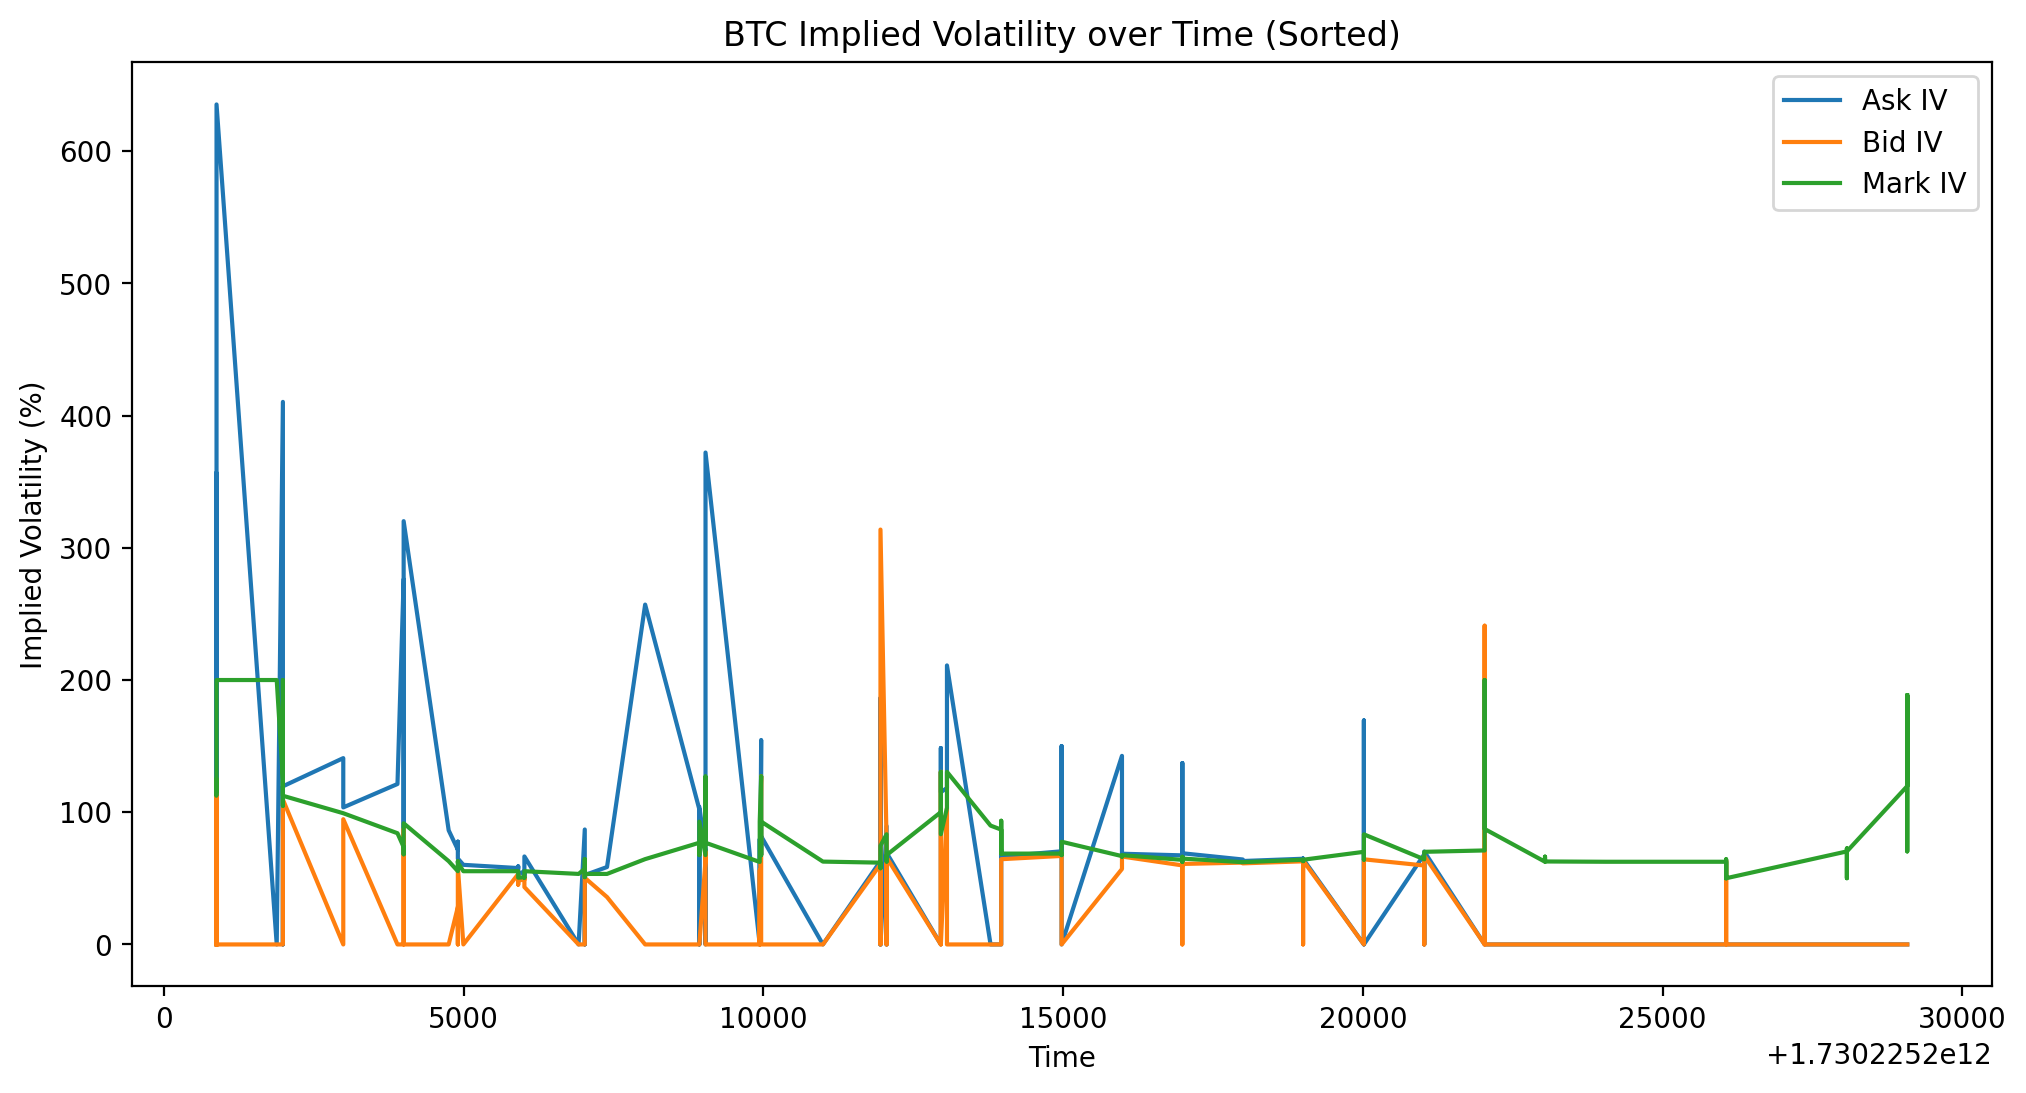

In [21]:
# Sorting the data by timestamp to ensure a smoother, sequential plot
btc_data_sorted = btc_data.sort_values(by='timestamp')

# Re-plotting the sorted data for implied volatility over time
plt.figure(figsize=(12, 6))
plt.plot(btc_data_sorted['timestamp'], btc_data_sorted['ask_iv'], label='Ask IV')
plt.plot(btc_data_sorted['timestamp'], btc_data_sorted['bid_iv'], label='Bid IV')
plt.plot(btc_data_sorted['timestamp'], btc_data_sorted['mark_iv'], label='Mark IV')

# Labeling the chart
plt.xlabel('Time')
plt.ylabel('Implied Volatility (%)')
plt.title('BTC Implied Volatility over Time (Sorted)')
plt.legend()
plt.show()


### Consistency Across Different Options

In [22]:
# Aggregating without lambda for bid-ask IV spread to avoid TypeError
mark_iv_summary = btc_data.groupby(['Expiration Date', 'Strike Price']).agg(
    mark_iv_mean=('mark_iv', 'mean'),
    mark_iv_std=('mark_iv', 'std'),
    ask_iv_mean=('ask_iv', 'mean'),
    bid_iv_mean=('bid_iv', 'mean'),
).reset_index()

# Calculating the IV spread separately and adding it as a column
mark_iv_summary['iv_spread_mean'] = mark_iv_summary['ask_iv_mean'] - mark_iv_summary['bid_iv_mean']



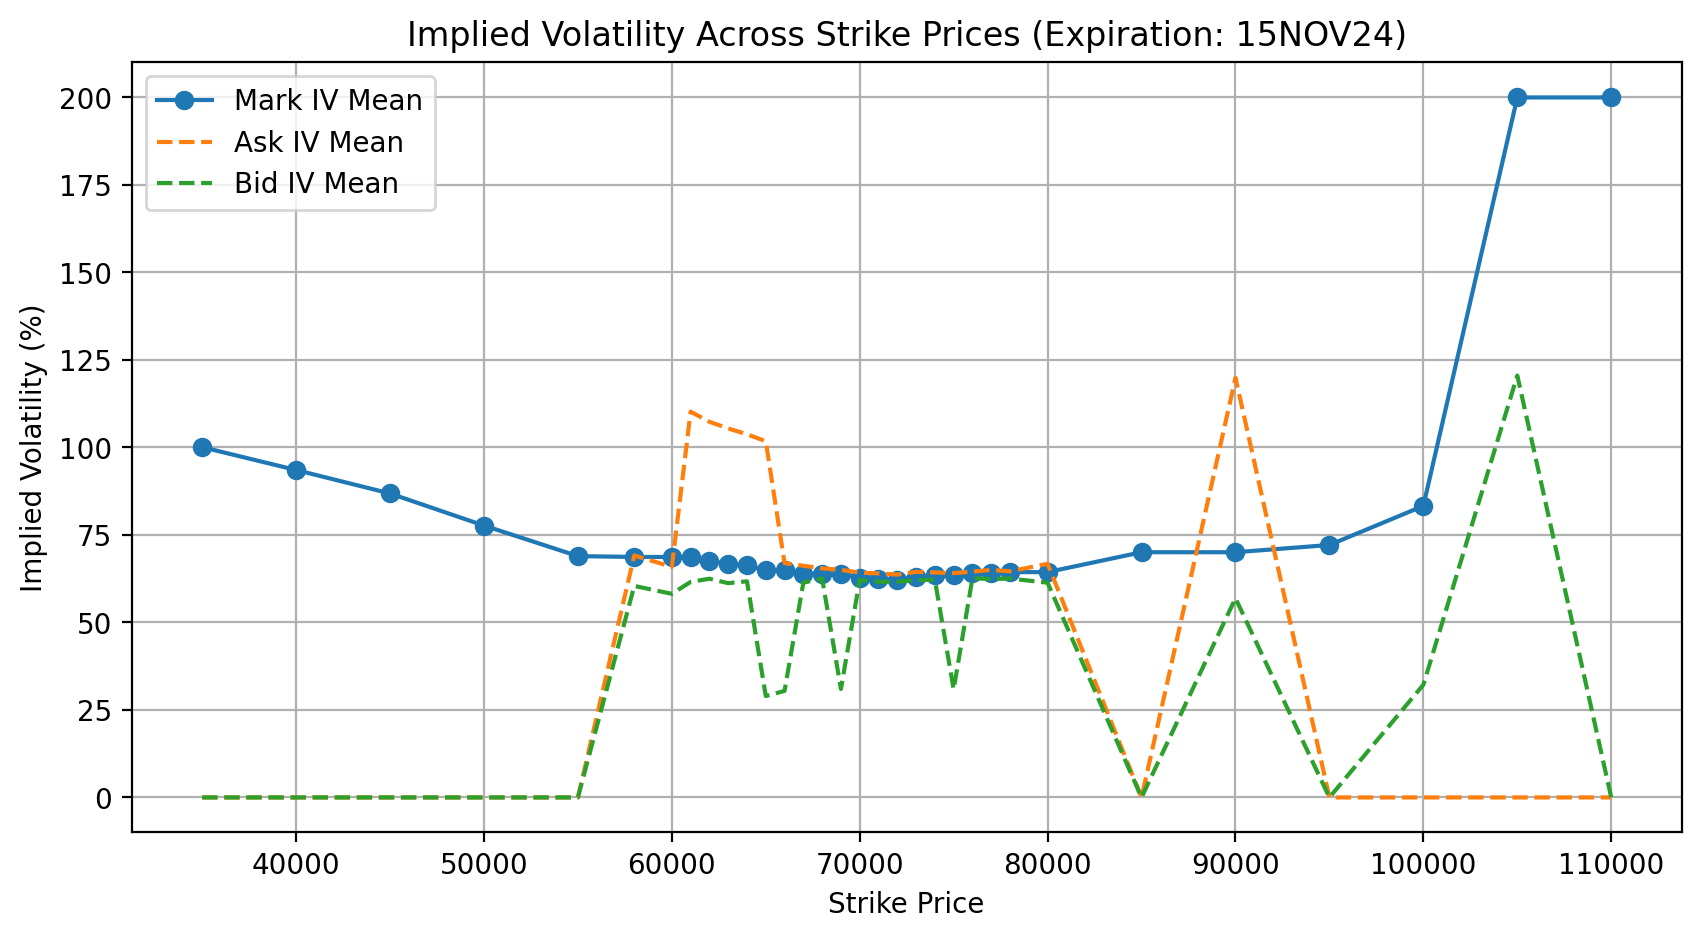

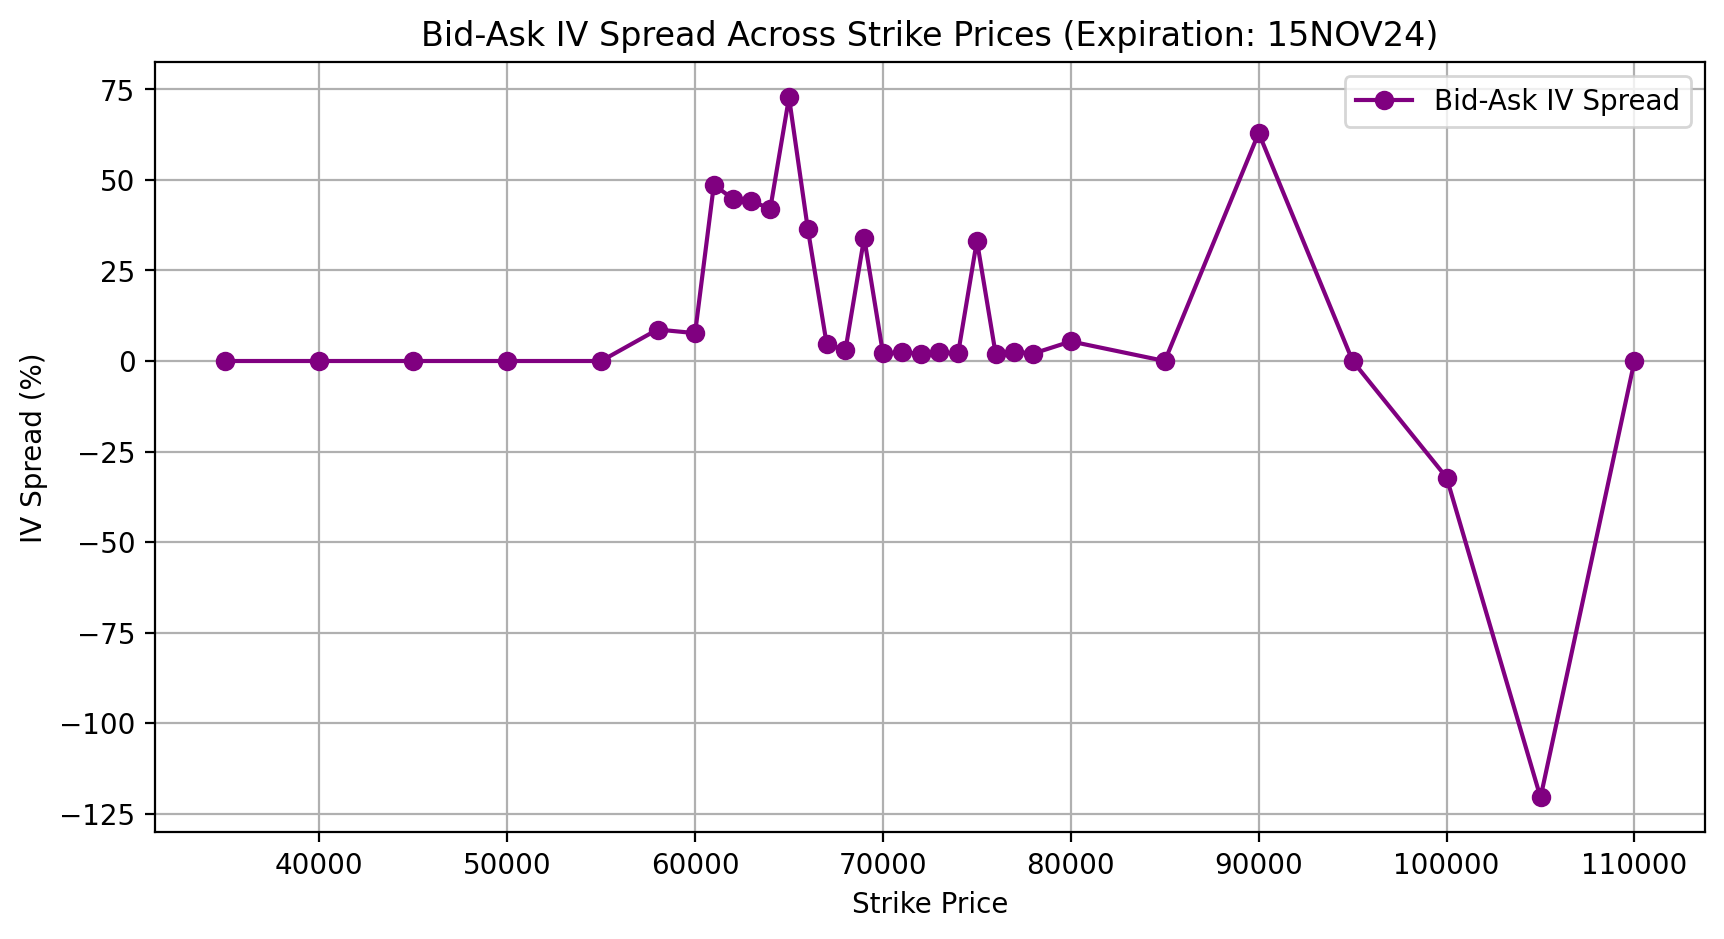

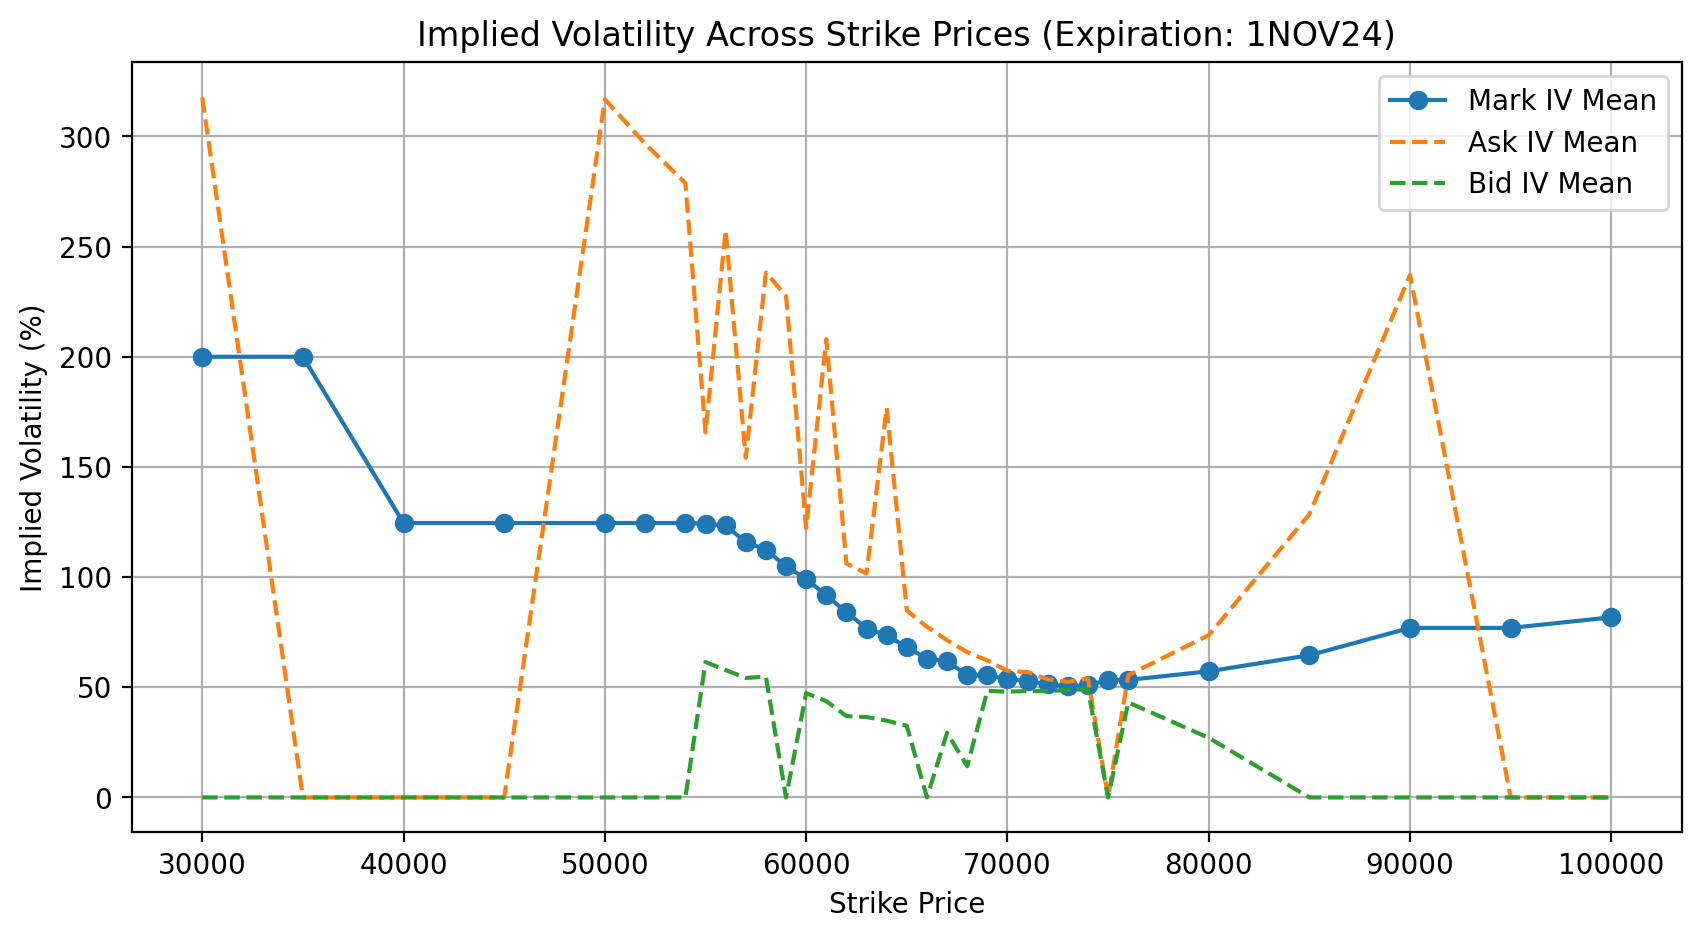

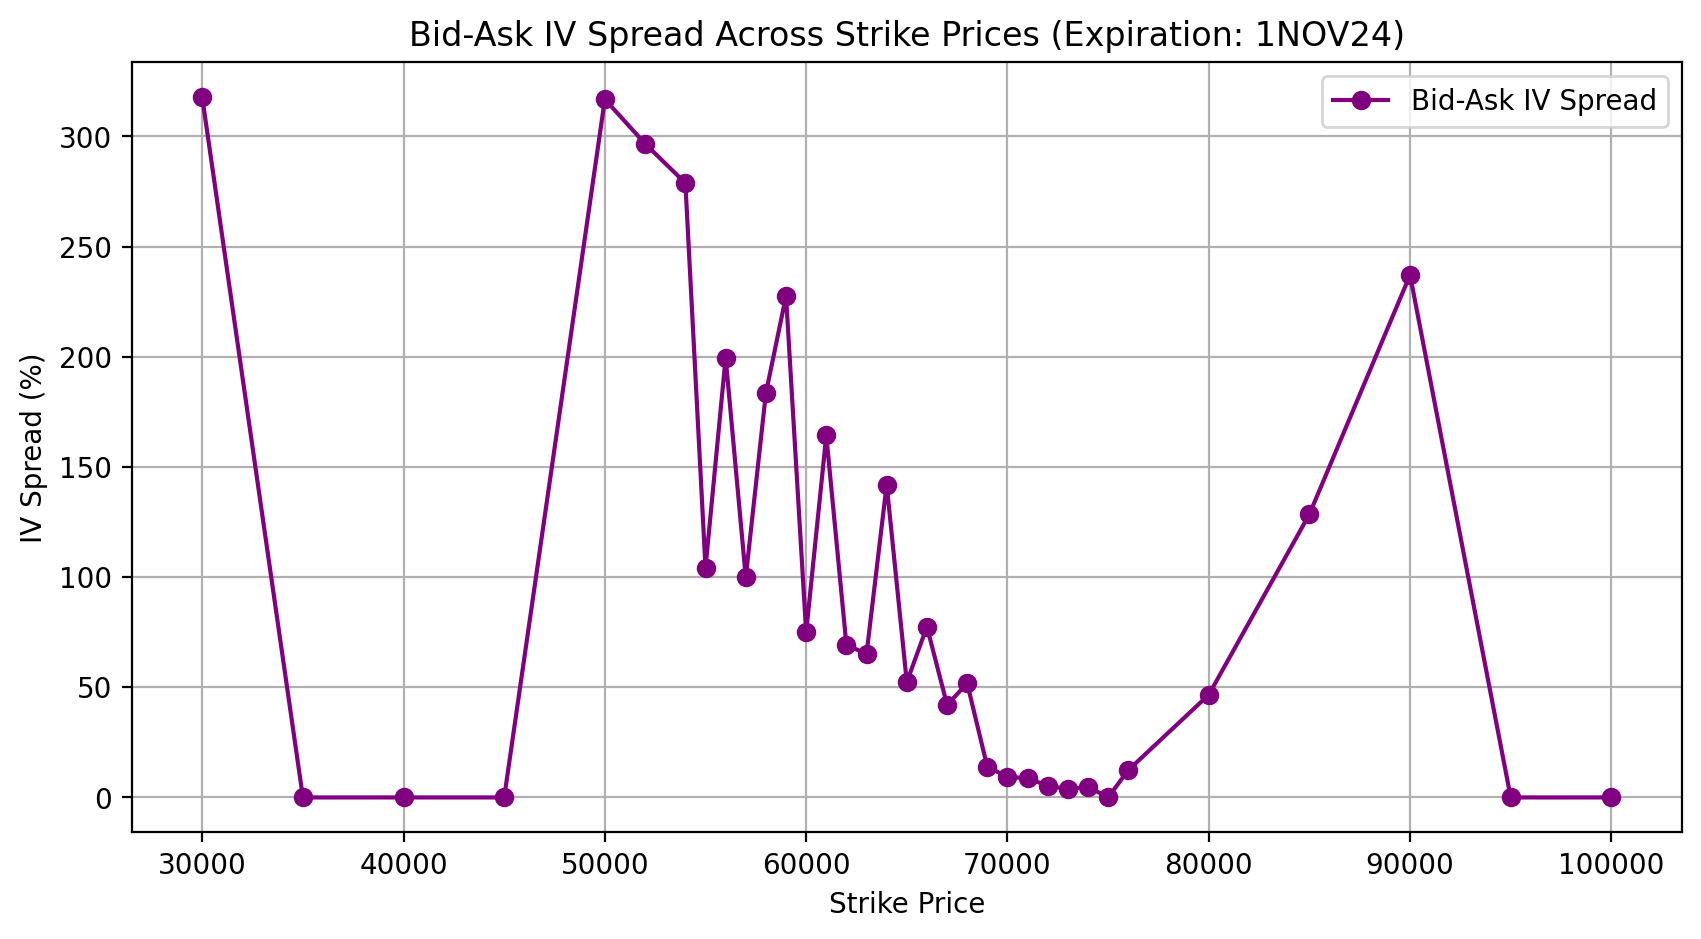

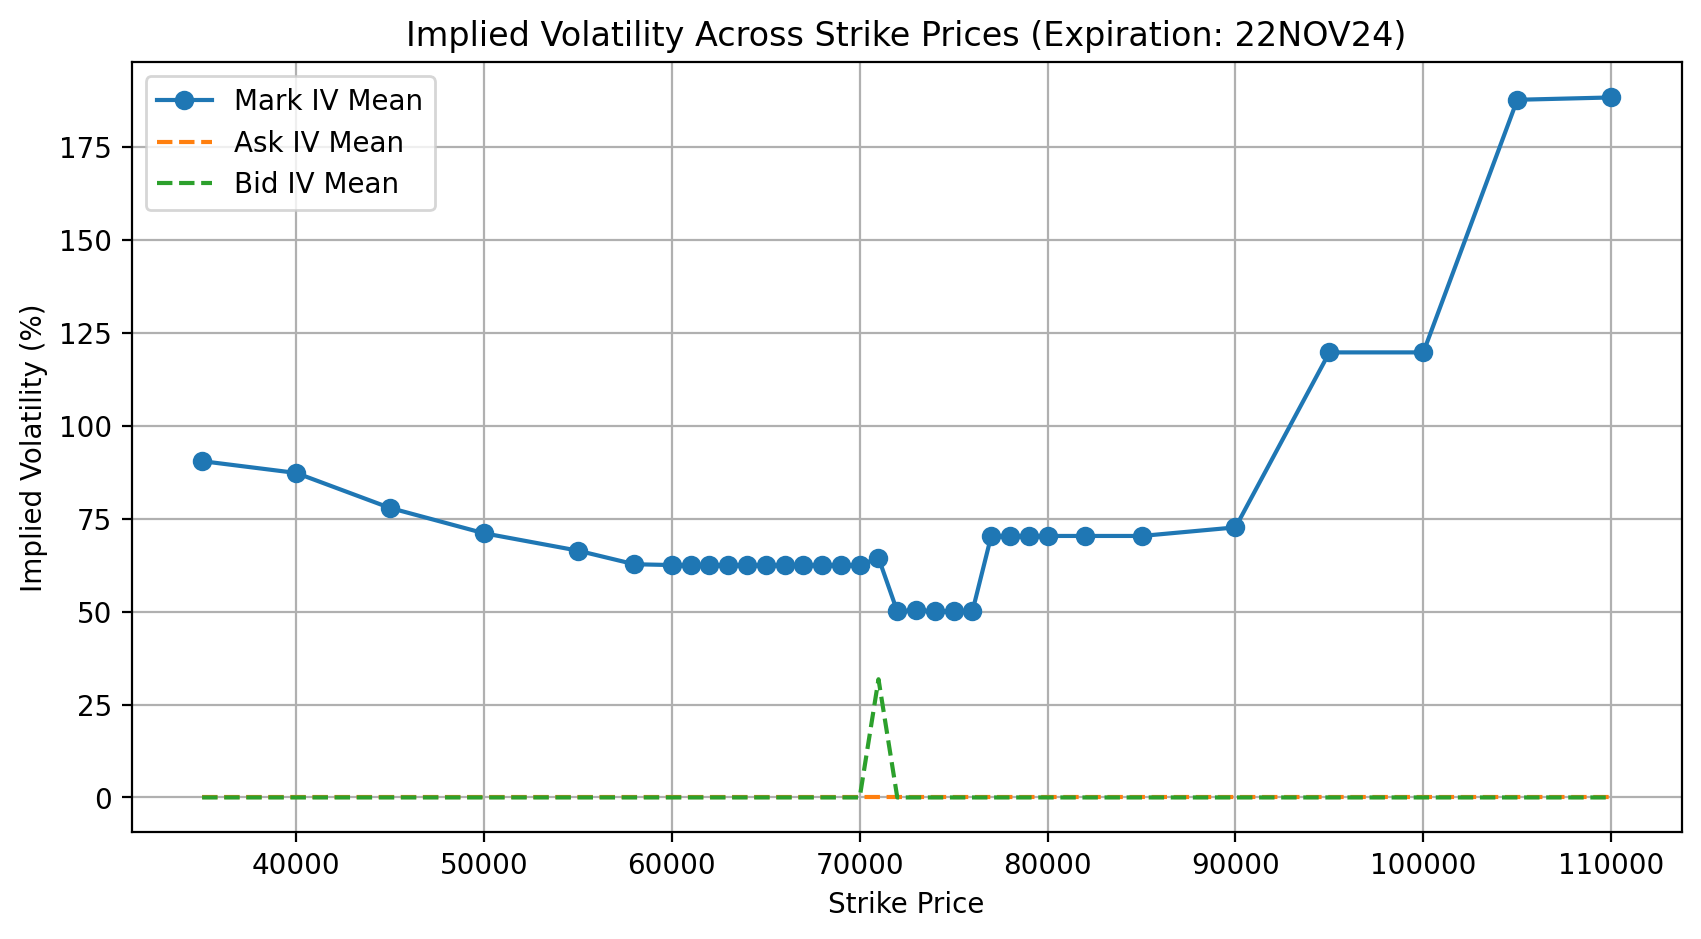

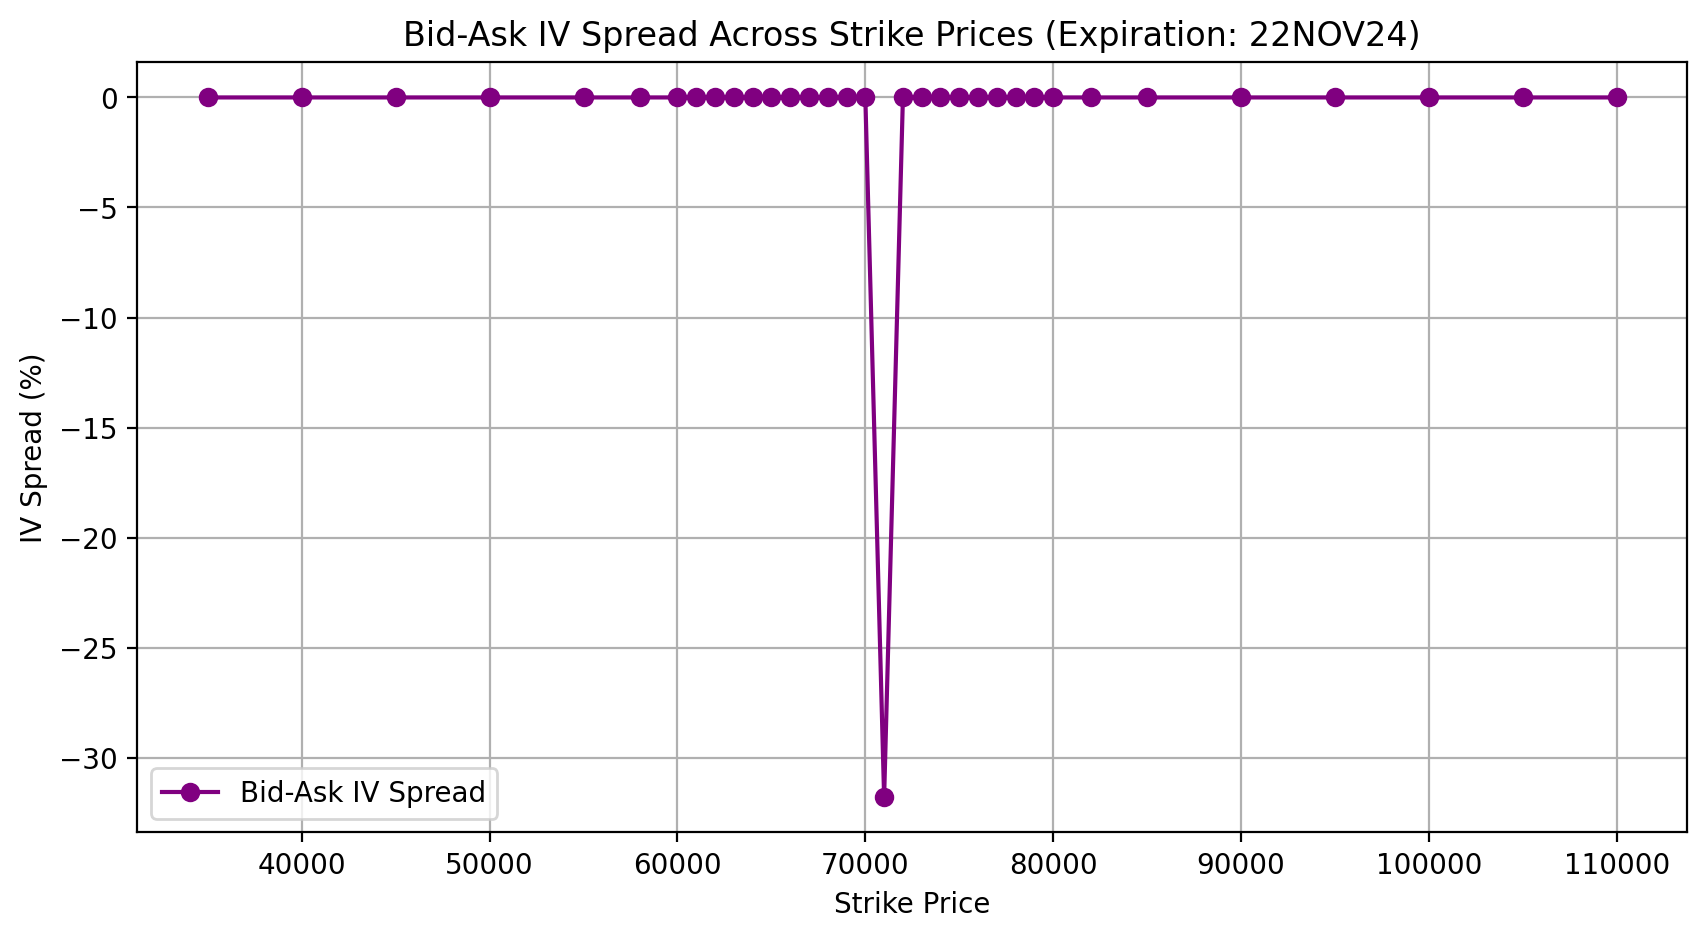

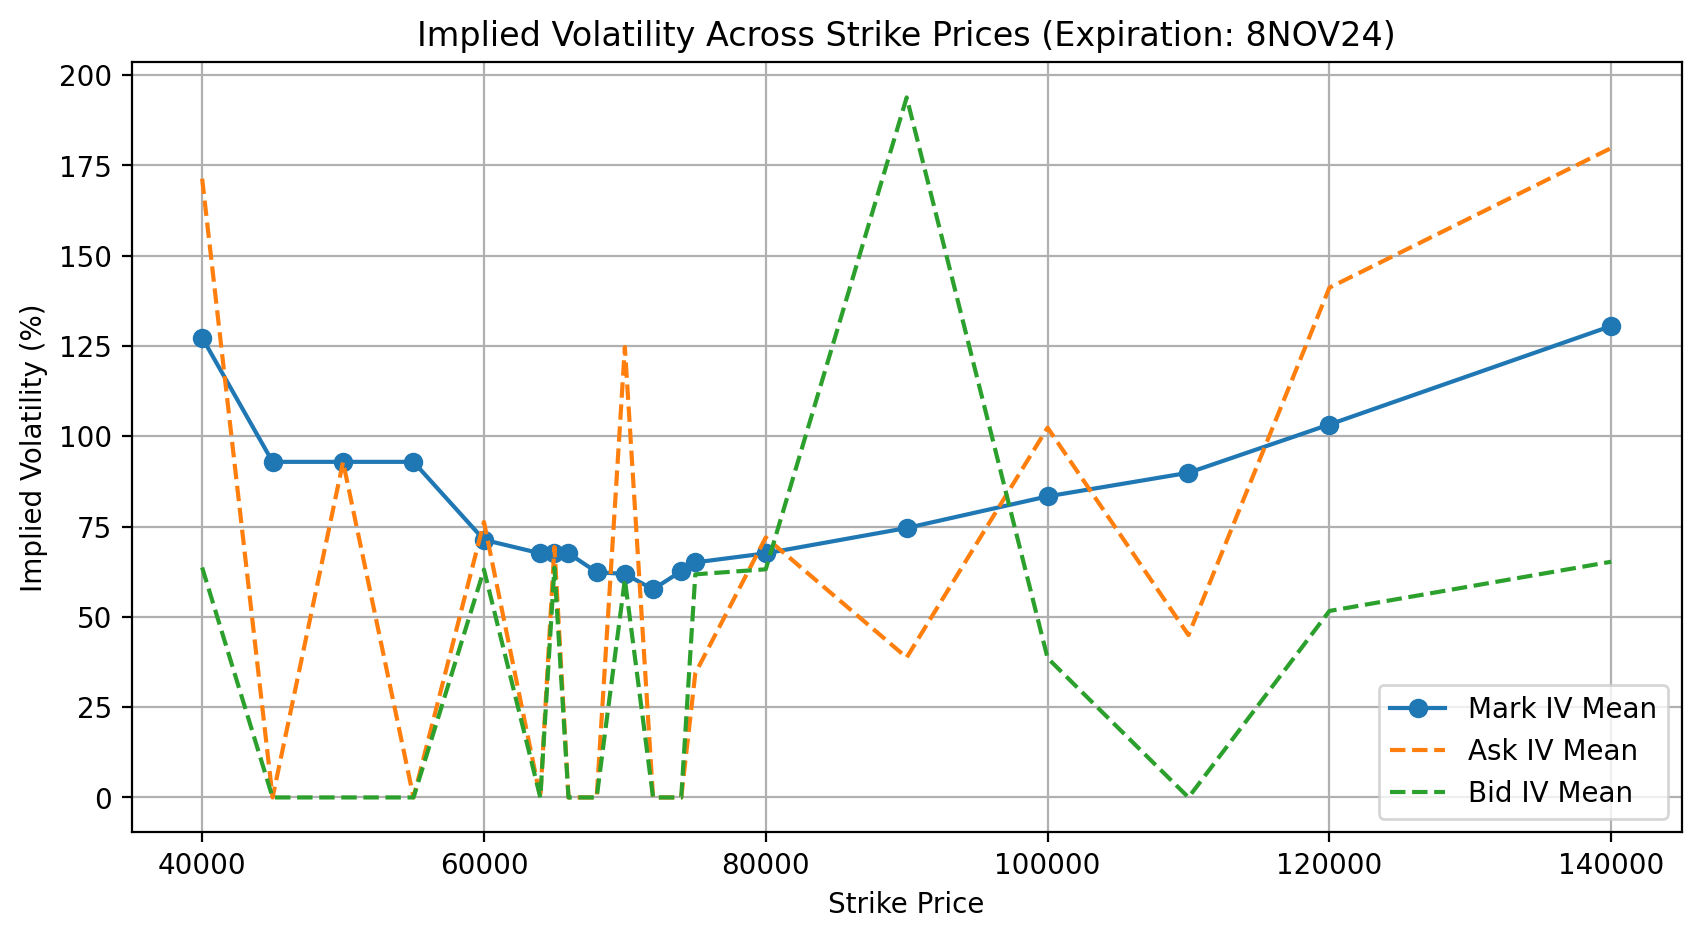

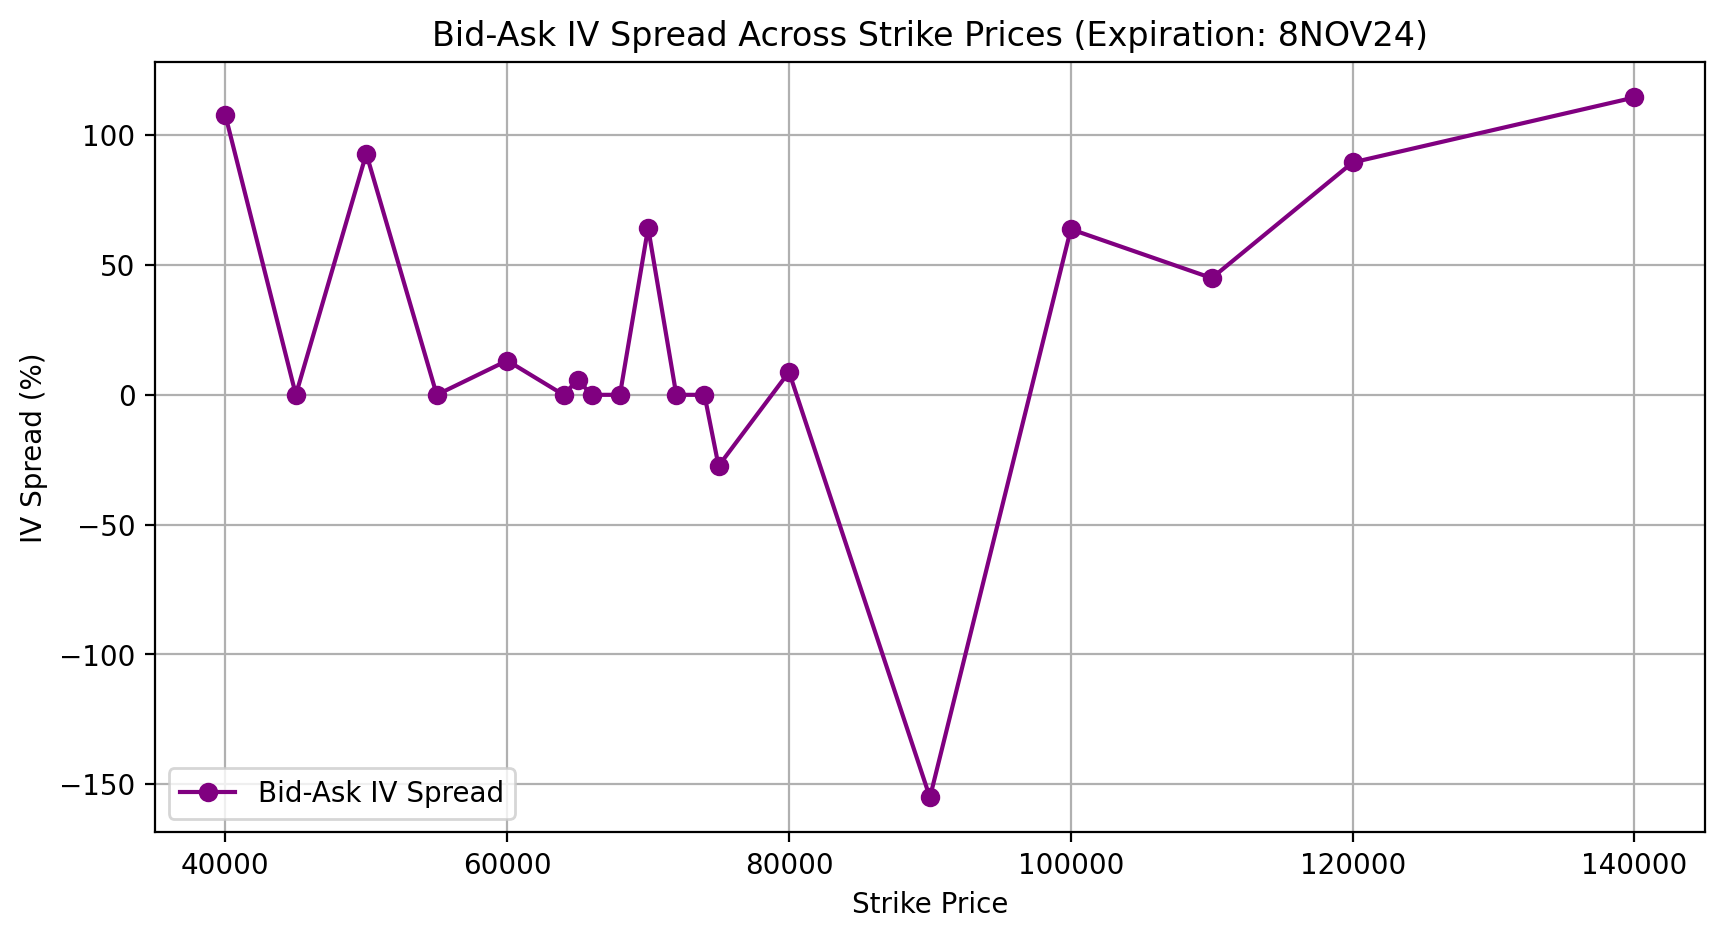

In [23]:
import matplotlib.pyplot as plt

# Plotting Mark IV Mean and Bid-Ask IV Spread across Strike Prices for each Expiration Date
# Looping through each unique expiration date to create separate plots for clarity

unique_expirations = mark_iv_summary['Expiration Date'].unique()

for expiration in unique_expirations:
    data = mark_iv_summary[mark_iv_summary['Expiration Date'] == expiration]
    
    # Plot Mark IV Mean
    plt.figure(figsize=(10, 5))
    plt.plot(data['Strike Price'], data['mark_iv_mean'], label='Mark IV Mean', marker='o')
    plt.plot(data['Strike Price'], data['ask_iv_mean'], label='Ask IV Mean', linestyle='--')
    plt.plot(data['Strike Price'], data['bid_iv_mean'], label='Bid IV Mean', linestyle='--')
    plt.title(f'Implied Volatility Across Strike Prices (Expiration: {expiration})')
    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility (%)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot Bid-Ask IV Spread
    plt.figure(figsize=(10, 5))
    plt.plot(data['Strike Price'], data['iv_spread_mean'], color='purple', label='Bid-Ask IV Spread', marker='o')
    plt.title(f'Bid-Ask IV Spread Across Strike Prices (Expiration: {expiration})')
    plt.xlabel('Strike Price')
    plt.ylabel('IV Spread (%)')
    plt.legend()
    plt.grid(True)
    plt.show()
